In [1]:
!pip install pandas-profiling

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(13, 10)})

pd.pandas.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('kc_house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Data Analysis and Preparation

In [9]:
# Conditions from 1 to 5 : worn out to excellent
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [10]:
# Grade from 1 to 13 : Poor to excellent
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [11]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [12]:
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [13]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [14]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [15]:
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [16]:
# df['condition'] = df['condition'].map({1:'Worn-out', 2:'Condition-2', 3:'Condition-med', 4:'Condition-4', 5:'Condition-excellent'})

# df['grade'] = df['grade'].astype('str')
# for x in df['grade'].unique():
#     df['grade'] = df['grade'].map({x:'Grade-'+str(x)})

# df['grade'] = df['grade'].map({1:'Grade-1', 2:'Grade-2', 4:'Grade-4', 5:'Grade-5', 6:'Grade-6', 7:'Grade-7', 8:'Grade-8', 9:'Grade-9', 10:'Grade-10', 11:'Grade-11', 12:'Grade-12', 13:'Grade-13'})


In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [19]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

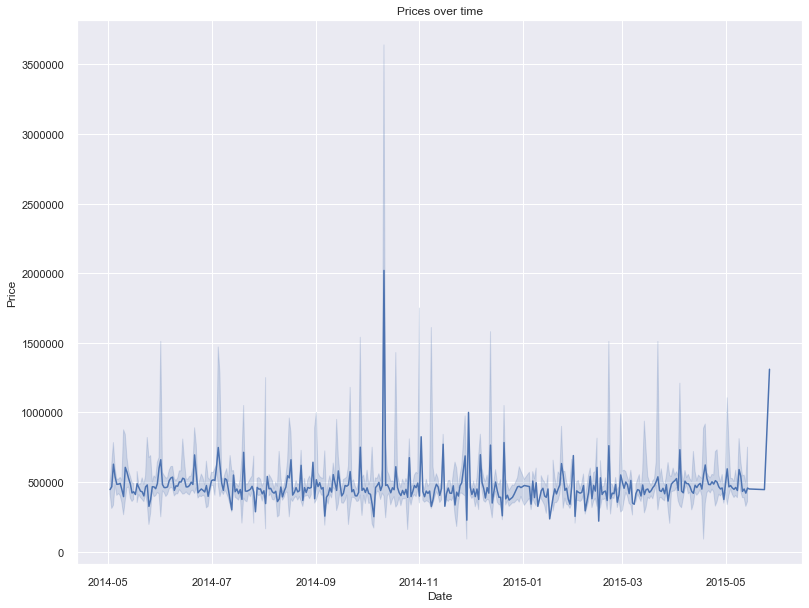

In [21]:
ax = sns.lineplot(x='date', y='price', estimator=np.median, data=df)
ax.set(xlabel='Date',
      ylabel='Price',
      title='Prices over time')
plt.show()

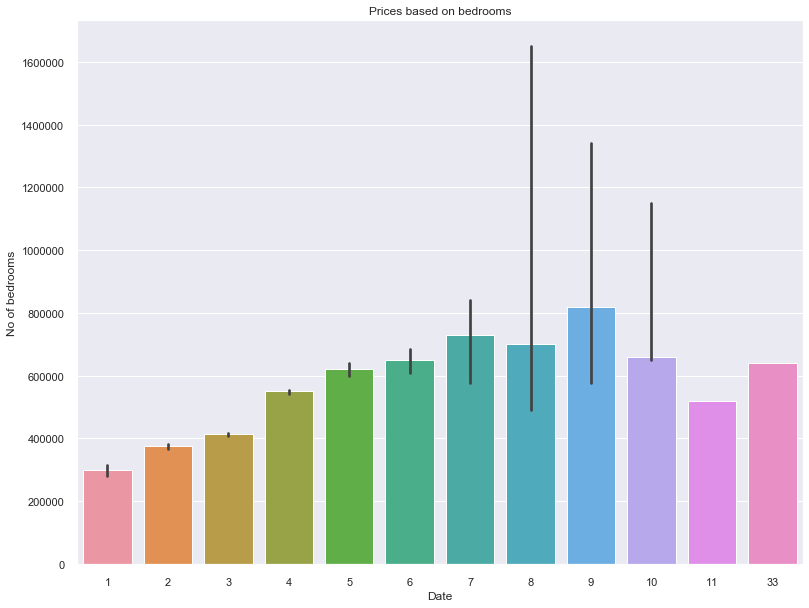

In [52]:
ax = sns.barplot(x='bedrooms', y='price', estimator=np.median, data=df)
ax.set(xlabel='Date',
      ylabel='No of bedrooms',
      title='Prices based on bedrooms')
plt.show()

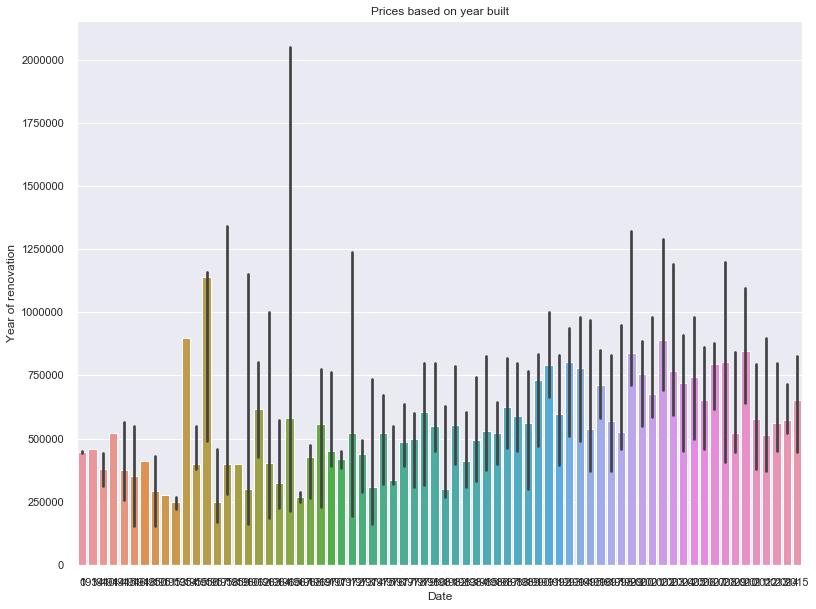

In [53]:
ax = sns.barplot(x='yr_renovated', y='price', estimator=np.median, data=df)
ax.set(xlabel='Date',
      ylabel='Year of renovation',
      title='Prices based on year built')
plt.show()

In [24]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11309,7234601221,2014-10-14,687500.0,3,1.50,1280,2114,1.5,0,0,3,8,1280,0,1904,0,98122,47.6174,-122.308,1540,1456
256,7972601890,2014-10-20,385000.0,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,98106,47.5278,-122.345,1910,7620
3668,7853240100,2014-09-02,772500.0,5,2.75,3890,9130,2.0,0,0,3,9,3890,0,2004,0,98065,47.5407,-121.860,3450,8361
20100,952002250,2015-03-24,407000.0,2,2.50,1340,999,2.0,0,0,3,8,940,400,2008,0,98116,47.5655,-122.386,1470,1436
15623,1193000380,2015-03-30,740000.0,4,2.25,2230,6000,1.5,0,2,3,8,1810,420,1928,0,98199,47.6464,-122.391,2840,6000
13458,98030530,2014-06-10,745000.0,4,3.25,3490,7024,2.0,0,0,3,10,3490,0,2006,0,98075,47.5834,-121.972,3450,6866
17919,8732130940,2014-06-09,213000.0,4,1.75,1980,9000,1.0,0,0,2,7,1480,500,1978,0,98023,47.3071,-122.381,1980,9360
4543,7224500300,2015-03-25,221000.0,3,1.00,1240,5250,1.5,0,0,4,6,1240,0,1904,0,98055,47.4917,-122.206,1240,5250
668,5151600340,2014-07-09,290000.0,3,1.50,1950,15954,1.0,0,0,4,8,1950,0,1959,0,98003,47.3360,-122.319,1940,12667
18801,1745000090,2014-11-10,208000.0,3,1.50,1210,7247,1.0,0,0,4,7,1210,0,1967,0,98003,47.3280,-122.321,1370,7869


In [25]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [26]:
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

# Feature Engineering 

In [27]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8448,4343800100,2014-10-21,315000.0,3,1.75,1680,7250,1.0,0,0,3,7,930,750,1952,0,98133,47.7201,-122.350,1340,7250
16582,2787311190,2014-11-14,252500.0,3,2.50,1780,7192,1.0,0,0,4,7,1250,530,1974,0,98031,47.4093,-122.173,1870,8500
2398,3336000791,2015-04-07,325000.0,3,1.00,950,4500,1.0,0,0,4,6,950,0,1943,0,98118,47.5273,-122.265,1140,4500
10497,6600220550,2014-06-26,495000.0,3,1.75,1440,11787,1.0,0,0,3,8,1440,0,1983,0,98074,47.6276,-122.033,2190,11787
2417,8078350030,2014-06-02,580000.0,4,2.50,2220,7064,2.0,0,0,3,8,2220,0,1988,0,98029,47.5716,-122.022,2220,7451
13211,5016002240,2014-10-08,1010000.0,3,2.25,2160,7500,2.0,0,0,3,10,2160,0,1982,0,98112,47.6232,-122.299,1550,3839
14672,8608900205,2015-04-03,565500.0,3,1.75,1780,5850,1.0,0,0,5,7,980,800,1944,0,98116,47.5589,-122.392,1550,5850
1763,2473350710,2014-10-27,390000.0,4,1.75,2330,8364,1.0,0,0,4,8,2330,0,1968,0,98058,47.4568,-122.146,2180,9630
19173,7942601475,2014-05-20,345600.0,5,3.50,2800,5120,2.5,0,0,3,9,2800,0,1903,2005,98122,47.6059,-122.310,1780,5120
7979,3886903615,2015-04-16,1290000.0,4,2.50,3430,7200,2.0,0,0,3,9,3430,0,2014,0,98033,47.6842,-122.196,1530,7800


In [28]:
def extract_date(df, column):
    df[column+"_day"] = df[column].apply(lambda x: x.day)
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    df[column+"_year"] = df[column].apply(lambda x: x.year)
    
extract_date(df, 'date')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015


In [29]:
# Dealing with the renovated column
# Copy yr_renovate column for manipulation
df['renovate_status'] = df['yr_renovated']

df['renovate_status'] = np.where(df['renovate_status'] > 0, 1, 0)

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovate_status
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015,0


In [31]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovate_status
13478,1336800065,2015-03-24,1330000.0,4,2.25,3260,4640,2.0,0,0,5,9,2360,900,1907,0,98112,47.6272,-122.312,3240,5800,24,3,2015,0
8878,4217400540,2014-09-29,815241.0,5,2.25,2060,4800,2.5,0,0,3,8,2060,0,1907,0,98105,47.6600,-122.282,1740,4800,29,9,2014,0
3736,2781250750,2014-08-28,222000.0,2,2.00,1360,3300,2.0,0,0,3,6,1360,0,2004,0,98038,47.3489,-122.022,1310,3300,28,8,2014,0
1837,1313500070,2014-08-20,249000.0,3,1.50,1580,7200,1.0,0,0,4,7,1080,500,1976,0,98092,47.2761,-122.152,1580,7470,20,8,2014,0
828,7376300060,2014-05-15,465750.0,3,1.50,1260,10350,1.0,0,0,3,7,1260,0,1959,0,98008,47.6357,-122.123,1800,10350,15,5,2014,0


In [32]:
# cats_cols = ['condition', 'grade']

# df = pd.get_dummies(df, columns=cats_cols)
# df.shape

In [33]:
df.shape

(21597, 25)

# Feature Selection

In [34]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_day', 'date_month',
       'date_year', 'renovate_status'],
      dtype='object')

In [35]:
ignored_cols = ['date', 'price', 'view']

In [36]:
x = df.drop(columns=ignored_cols)

y = df['price']

# Model Development

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

x_train.shape, x_test.shape

((17277, 22), (4320, 22))

In [38]:
# Linear Regression Algorithm

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

In [39]:
lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr)
lr_mse = metrics.mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_lr))
lr_r2 = metrics.r2_score(y_test, y_pred_lr)

print('Linear Regression')
print('Mean Absolute Error: ', lr_mae)
print('Mean Squared Error: ', lr_mse)
print('Root Mean Squared Error: ', lr_rmse)
print('R2 Score: ', lr_r2)

Linear Regression
Mean Absolute Error:  125391.18349258596
Mean Squared Error:  35180888807.12484
Root Mean Squared Error:  354.10617545107283
R2 Score:  0.7050629387121485


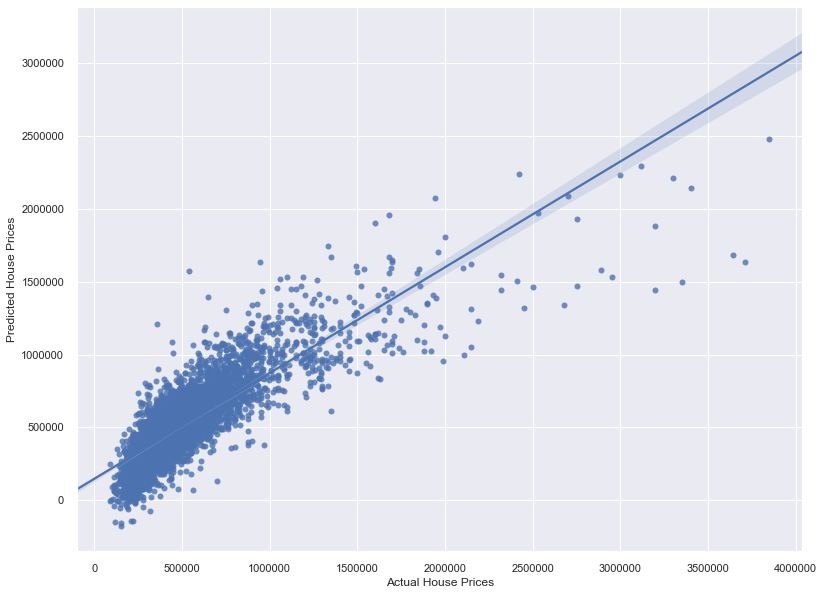

In [40]:
ax = sns.regplot(x = y_test, y = y_pred_lr)
ax.set(xlabel = 'Actual House Prices',
      ylabel = 'Predicted House Prices')
plt.show()

In [41]:
# Decision Tree Algorithm

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

In [42]:
dt_mae = metrics.mean_absolute_error(y_test, y_pred_dt)
dt_mse = metrics.mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_dt))
dt_r2 = metrics.r2_score(y_test, y_pred_dt)

print('Decision Tree')
print('Mean Absolute Error', dt_mae)
print('Mean Squared Error', dt_mse)
print('Root Mean Squared Error',dt_rmse)
print('R2 Score',dt_r2)

Decision Tree
Mean Absolute Error 97344.95578703703
Mean Squared Error 29463494499.922916
Root Mean Squared Error 312.0015317062354
R2 Score 0.7529944018549592


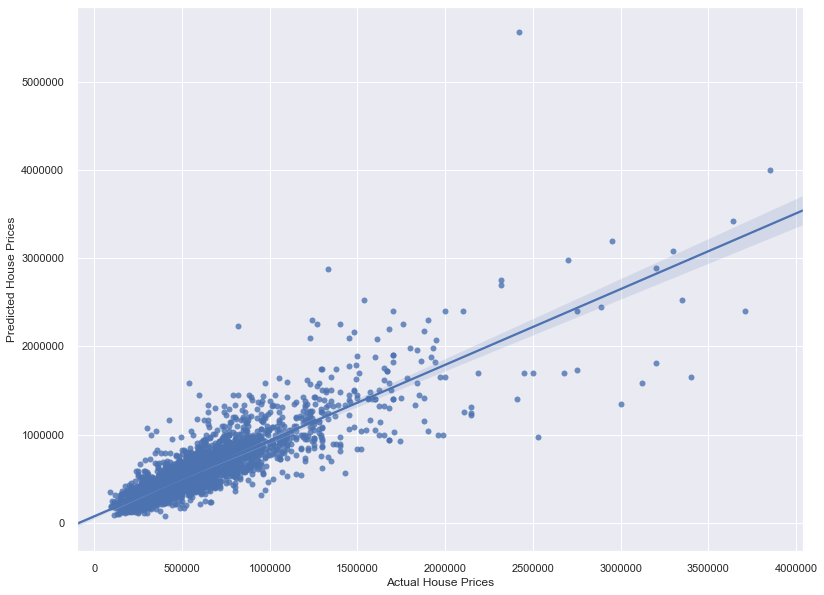

In [43]:
ax = sns.regplot(x = y_test, y = y_pred_dt)
ax.set(xlabel = 'Actual House Prices',
      ylabel = 'Predicted House Prices')
plt.show()

[0.33917862761552076, 0.4213513647183328, 0.4252081506393489, 0.39820828657188245, 0.3823814895554355, 0.3793234972500307, 0.36320543713508, 0.3573053731195338, 0.3459042733004587, 0.33258373116065854, 0.32041264185702223, 0.30647572149177094, 0.2953148742045373, 0.282598981874968, 0.26830042594788295, 0.25715100282078984, 0.25118170872807233, 0.24581808763578383, 0.2411960372613393, 0.23581094508541978]


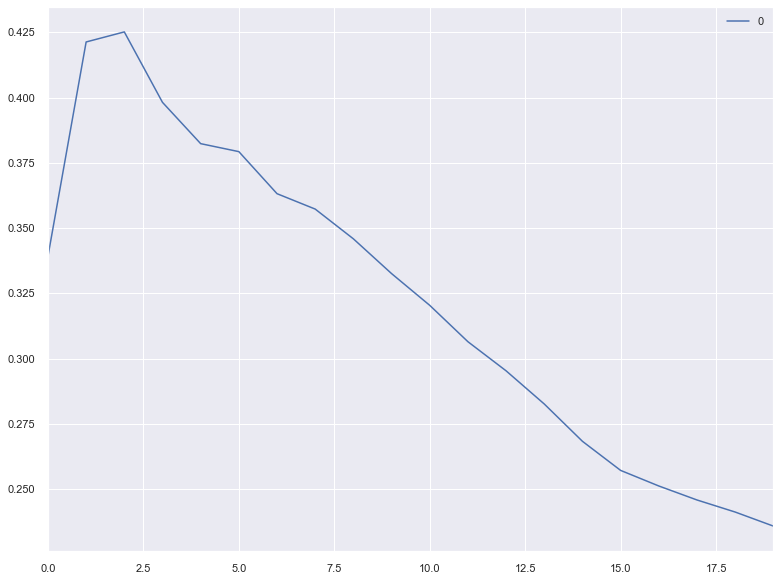

In [44]:
r2_score_yetu = []

for K in range(20):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    r2_value = metrics.r2_score(y_test, pred)
    r2_score_yetu.append(r2_value)
    
print(r2_score_yetu)
pd.DataFrame(r2_score_yetu).plot()

In [45]:
knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

In [46]:
knn_mae = metrics.mean_absolute_error(y_test, y_pred_knn)
knn_mse = metrics.mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_knn))
knn_r2 = metrics.r2_score(y_test, y_pred_knn)

print('K Neighbors Regressor')
print('Mean Absolute Error', knn_mae)
print('Mean Squared Error', knn_mse)
print('Root Mean Squared Error',knn_rmse)
print('R2 Score',knn_r2)

K Neighbors Regressor
Mean Absolute Error 140127.6400462963
Mean Squared Error 69022771188.36064
Root Mean Squared Error 374.3362660046396
R2 Score 0.4213513647183328


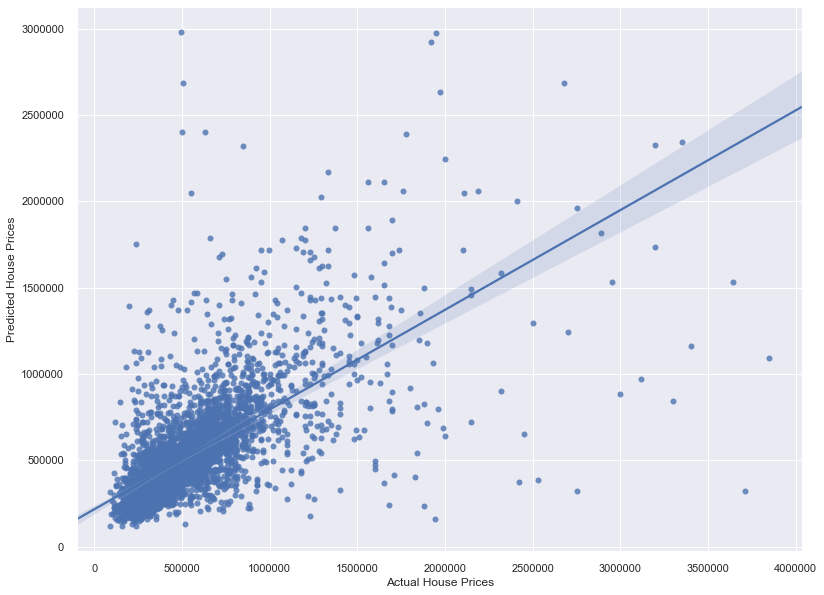

In [47]:
ax = sns.regplot(x = y_test, y = y_pred_knn)
ax.set(xlabel = 'Actual House Prices',
      ylabel = 'Predicted House Prices')
plt.show()

In [48]:
# Random Forest

rf = RandomForestRegressor(n_estimators=100)

rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
y_pred_rf = rf.predict(x_test)

In [50]:
rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_rf))
rf_r2 = metrics.r2_score(y_test, y_pred_rf)

print('Random Forest Regressor')
print('Mean Absolute Error: ', rf_mae)
print('Mean Squared Error: ', rf_mse)
print('Root Mean Squared Error: ', rf_rmse)
print('R2 Score: ', rf_r2)

Random Forest Regressor
Mean Absolute Error:  67573.79101851852
Mean Squared Error:  14472086129.77443
Root Mean Squared Error:  259.9495932262994
R2 Score:  0.8786740557573429


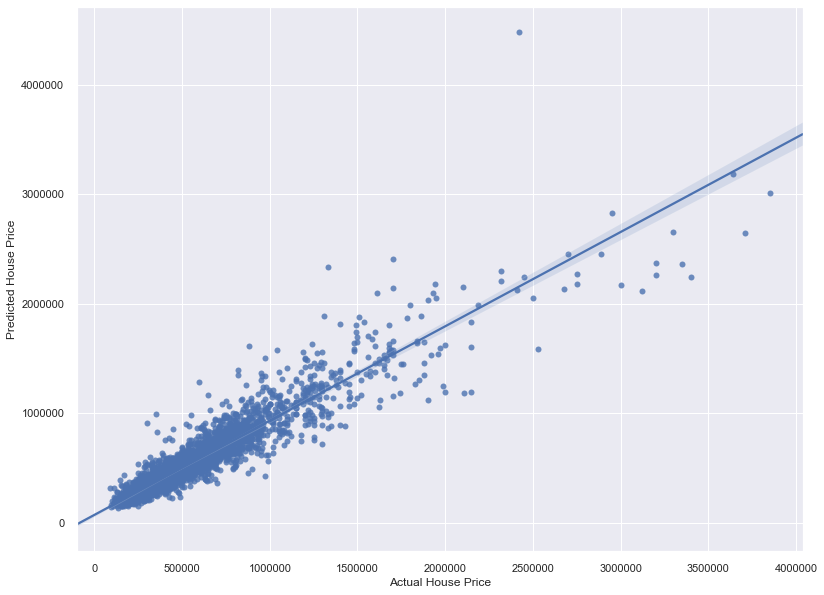

In [51]:
ax = sns.regplot(x = y_test, y = y_pred_rf)
ax.set(xlabel = 'Actual House Price',
      ylabel = 'Predicted House Price')
plt.show()